In [22]:
import pandas as pd
d=pd.read_excel('/content/AIR QUALITY (6).xlsx')
print(d)

           Date      Time  PM2.5  PM10  NO2  NH3  SO2  CO  Ozone  AQI
0    01.12.2022  06:00:00     73    83    5    3    8  32     20   83
1    01.12.2022  12:00:00     74    83    5    3    8  32     20   83
2    01.12.2022  15:00:00     73    84    5    3    8  35     21   84
3    01.12.2022  18:00:00     73    85    5    3    8  37     22   85
4    01.12.2022  20:00:00     75    84    5    3    8  38     20   84
..          ...       ...    ...   ...  ...  ...  ...  ..    ...  ...
222  14.01.2023  14.00.00    129   119    9    2   17  81     18  129
223  14.01.2023  20.00.00    119   114    9    2   16  69     18  119
224  14.01.2023  23.00.00    120   113    9    2   16  72     17  120
225  15.01.2023   9.00.00    136   113    6    2   16  76     16  136
226  15.01.2023  12.00.00    137   113    6    2   16  79     17  137

[227 rows x 10 columns]


In [23]:
x=d.iloc[:,2:9]
y=d.iloc[:,9:10]
print(x,'\n',y)

     PM2.5  PM10  NO2  NH3  SO2  CO  Ozone
0       73    83    5    3    8  32     20
1       74    83    5    3    8  32     20
2       73    84    5    3    8  35     21
3       73    85    5    3    8  37     22
4       75    84    5    3    8  38     20
..     ...   ...  ...  ...  ...  ..    ...
222    129   119    9    2   17  81     18
223    119   114    9    2   16  69     18
224    120   113    9    2   16  72     17
225    136   113    6    2   16  76     16
226    137   113    6    2   16  79     17

[227 rows x 7 columns] 
      AQI
0     83
1     83
2     84
3     85
4     84
..   ...
222  129
223  119
224  120
225  136
226  137

[227 rows x 1 columns]


In [24]:
from sklearn.model_selection import train_test_split                                                        
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(181, 7)
(181, 1)
(46, 7)
(46, 1)


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.9821557169531218
intercept: [-0.08580502]
coefficients: [[ 0.35879411  0.61398745  0.0451548   1.25779111 -0.10569021  0.11209191
   0.08726029]]


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
cls=DecisionTreeRegressor()
cc=cls.fit(X_train,y_train)

[Text(0.5508832789179104, 0.9615384615384616, 'x[1] <= 106.0\nsquared_error = 1150.348\nsamples = 181\nvalue = 91.541'),
 Text(0.30978894589552236, 0.8846153846153846, 'x[1] <= 59.0\nsquared_error = 254.212\nsamples = 127\nvalue = 71.764'),
 Text(0.12779850746268656, 0.8076923076923077, 'x[0] <= 62.0\nsquared_error = 71.572\nsamples = 34\nvalue = 51.324'),
 Text(0.08395522388059702, 0.7307692307692307, 'x[1] <= 49.0\nsquared_error = 29.316\nsamples = 30\nvalue = 48.867'),
 Text(0.048507462686567165, 0.6538461538461539, 'x[1] <= 44.5\nsquared_error = 2.729\nsamples = 15\nvalue = 44.267'),
 Text(0.029850746268656716, 0.5769230769230769, 'x[0] <= 18.0\nsquared_error = 0.975\nsamples = 11\nvalue = 43.455'),
 Text(0.014925373134328358, 0.5, 'x[5] <= 44.5\nsquared_error = 0.24\nsamples = 5\nvalue = 44.4'),
 Text(0.007462686567164179, 0.4230769230769231, 'squared_error = 0.0\nsamples = 3\nvalue = 44.0'),
 Text(0.022388059701492536, 0.4230769230769231, 'squared_error = 0.0\nsamples = 2\nvalue 

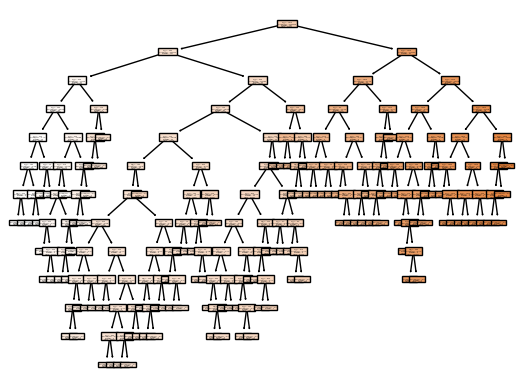

In [27]:
from sklearn import tree
tree.plot_tree(cc,filled=True)

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
print(np.sqrt(mean_squared_error(y_test,yp)))
print(mean_squared_error(y_test,yp ))
print(mean_absolute_error(y_test,yp ))

7.933144559926767
62.93478260869565
5.282608695652174


In [29]:
from sklearn import svm
from sklearn.metrics import accuracy_score
cc=svm.SVR(kernel='linear')


In [30]:
cl=cc.fit(X_train,y_train.values.ravel())

In [31]:
yp=cl.predict(x_test)
print(yp)

[147.62259929  84.0078113  131.52450591 112.78951808  51.26774488
 158.0747105   65.40141734  70.55439019  47.04856186  34.11970615
 113.70027808  74.73567956  57.41185177 158.7616967   67.12824551
  71.59086284 145.55048987  58.88854278 140.72856355 158.46658729
  68.82663613 129.94868069  91.2440461  156.19959543  64.61826953
 138.91962034 147.50442717  68.79136871  48.41329817 118.19504745
 123.07715941  57.60196488 145.24411624  31.64553289  66.56750968
 120.28668391 122.5694353   58.29434561  80.38678232 123.60915493
 145.62892173 130.06674224  70.84972155 160.11652519  72.43439862
  83.99975057]


In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
print(np.sqrt(mean_squared_error(y_test,yp)))
print(mean_squared_error(y_test,yp ))
print(mean_absolute_error(y_test,yp ))

4.9135132977734735
24.142612927396755
3.6699528174496265


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score 
kk=KNeighborsRegressor() 
kk.fit(X_train, y_train.values.ravel())

KNeighborsRegressor()

In [34]:
yp=cc.predict(x_test)
print(yp)
print(y_test)

[147.62259929  84.0078113  131.52450591 112.78951808  51.26774488
 158.0747105   65.40141734  70.55439019  47.04856186  34.11970615
 113.70027808  74.73567956  57.41185177 158.7616967   67.12824551
  71.59086284 145.55048987  58.88854278 140.72856355 158.46658729
  68.82663613 129.94868069  91.2440461  156.19959543  64.61826953
 138.91962034 147.50442717  68.79136871  48.41329817 118.19504745
 123.07715941  57.60196488 145.24411624  31.64553289  66.56750968
 120.28668391 122.5694353   58.29434561  80.38678232 123.60915493
 145.62892173 130.06674224  70.84972155 160.11652519  72.43439862
  83.99975057]
     AQI
212  150
171   81
20   134
114  112
66    51
23   166
126   63
93    72
77    52
53    43
89   116
159   73
196   52
10   163
30    71
154   71
13   144
163   72
85   144
24   166
120   67
142  129
147   96
35   158
131   77
144  136
207  146
90    70
65    48
111  117
202  129
41    57
25   136
54    43
99    67
74   123
203  130
44    55
6     79
28   120
12   146
29   125
193 

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
print(np.sqrt(mean_squared_error(y_test,yp)))
print(mean_squared_error(y_test,yp ))
print(mean_absolute_error(y_test,yp ))

4.9135132977734735
24.142612927396755
3.6699528174496265


In [36]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.9938992414449133
